## Approach

* **Step1** :  Build a digit(0-9) + A-Z characters classifier using a CNN architecture.
* **Step2** :  Apply character segmentation for the handwritten word image.
* **Step3** :  Classify each segmented letter and then get the final word in the image.

In [1]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=57aed98f11974e037e542ab7d834304d9917902d107e49fd415e0ce075e694c0
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [4]:
dir = "./dataset1/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [3]:
len(train_data)

140000

In [5]:
val_dir = "./dataset1/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [6]:
len(val_data)

15209

In [7]:
random.shuffle(train_data)
random.shuffle(val_data)

In [8]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [9]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [10]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [15]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [16]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [17]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [18]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [13]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [14]:
from tensorflow.keras.models import load_model
model = load_model('Offline_Handwritten.h5')

In [22]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
4375/4375 [==============================] - 13s 3ms/step - loss: 0.6152 - accuracy: 0.8037 - val_loss: 0.3383 - val_accuracy: 0.8943
Epoch 2/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.3482 - accuracy: 0.8822 - val_loss: 0.2661 - val_accuracy: 0.9106
Epoch 3/50
4375/4375 [==============================] - 13s 3ms/step - loss: 0.3050 - accuracy: 0.8951 - val_loss: 0.2692 - val_accuracy: 0.9115
Epoch 4/50
4375/4375 [==============================] - 13s 3ms/step - loss: 0.2798 - accuracy: 0.9034 - val_loss: 0.2691 - val_accuracy: 0.8953
Epoch 5/50
4375/4375 [==============================] - 12s 3ms/step - loss: 0.2618 - accuracy: 0.9082 - val_loss: 0.2324 - val_accuracy: 0.9257
Epoch 6/50
4375/4375 [==============================] - 13s 3ms/step - loss: 0.2494 - accuracy: 0.9126 - val_loss: 0.2446 - val_accuracy: 0.9139
Epoch 7/50
4375/4375 [==============================] - 13s 3ms/step - loss: 0.2388 - accuracy: 0.9164 - val_loss: 0.2462 - val_ac

In [23]:
model.save('Offline_Handwritten.h5')

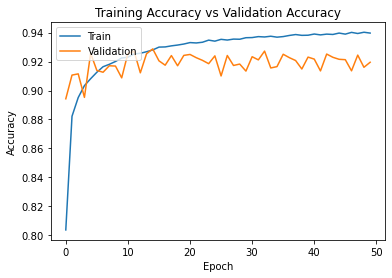

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

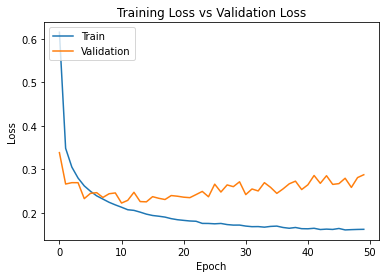

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Recognition and Post-Processing 
1. The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
2. The get letters function fetches the list of letters and get word function gets the individual word. 

In [15]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [32]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

    # Define a rectangular kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

    # Apply dilation using the kernel
    dilated = cv2.dilate(thresh1, kernel, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            aspect_ratio = w / h
            # Filter out contours with an aspect ratio that is too small or too large
            if 0.2 < aspect_ratio < 5:
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                roi = gray[y:y + h, x:x + w]
                thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
                thresh = cv2.resize(thresh, (28, 28), interpolation=cv2.INTER_CUBIC)  # Resize to 28x28
                thresh = thresh.astype("float32") / 255.0
                thresh = np.expand_dims(thresh, axis=-1)
                thresh = thresh.reshape(1, 28, 28, 1)
                ypred = model.predict(thresh)
                ypred = LB.inverse_transform(ypred)
                [x] = ypred
                letters.append(x)
    return letters, image

In [17]:
def get_word(letter):
    word = "".join(letter)
    return word

In [28]:
#minst
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the neural network model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_accuracy)

# Save the trained model for future use
model.save('mnist_model.h5')


Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2964 - accuracy: 0.9148
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1419 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1065 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0878 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0748 - accuracy: 0.9769
313/313 - 1s - loss: 0.0799 - accuracy: 0.9746 - 942ms/epoch - 3ms/step

Test accuracy: 0.9746000170707703


1/1 [==============================] - 0s 28ms/step
237663


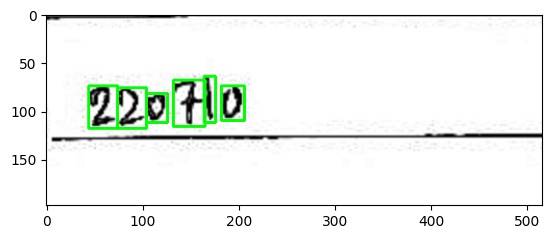

In [34]:
letter,image = get_letters("sharpened_image.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

LI10U


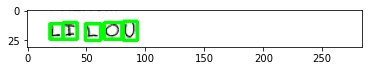

In [30]:
letter,image = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

7AFFFIX


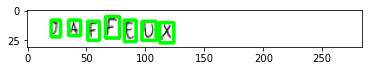

In [31]:
letter,image = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

BUPP


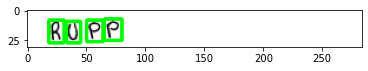

In [32]:
letter,image = get_letters("../input/handwriting-recognition/validation_v2/validation/VALIDATION_0005.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

VALENTINC


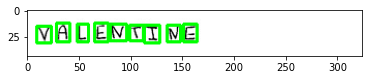

In [33]:
letter,image = get_letters("../input/handwriting-recognition/test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

## Drawbacks
1. The recognition part is dependent on the contour detection code, so if the opencv library is not able to find the character contour, then this method will fail.
2. There could be a lot of variation in a single handwritten letter in terms of writing style, therefore a lot more examples are needed for training this model.
3. This model will not work for connected texts like a cursive handwritten word.